In [29]:
!pip install -r requirements.txt

In [30]:
apikey = "KNqUDtV7Kcktiuheo3EoNhB0zDlCevFAdqZrKgdj"
#%pip install wbdata
import fooddatacentral as fdc
import pandas as pd
import numpy as np
import re
from  scipy.optimize import linprog as lp
#import wbdata
import sys
import io
import warnings
from eep153_tools.sheets import read_sheets
warnings.simplefilter("ignore")

Household Characteristics

In [31]:
ugd_z = pd.read_csv('Data Files/Uganda - Household Characteristics.csv')
ugd_z = ugd_z.set_index(['i','t','m'])
ugd_z.columns.name = 'k'
ugd_z.fillna(0, inplace=True)
ugd_z.head()

,,k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
0007d1f1449242feb5a25429644fb991,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.609438
0010cbae3cea4ec9831f6cd92b02dc16,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.098612
00246782f8654441a9df0f6ec0b6fc9f,2019-20,Northern,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.791759
003ed8d32f794609919d60d2ed8813e8,2019-20,Eastern,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.386294
004e93d7552248ed95d8bc3ec21bdbdb,2018-19,Eastern,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.386294


In [32]:
ugd_z.shape

(24363, 15)

In [33]:
#Import prices data
ugd_p = pd.read_csv('Data Files/Uganda - Food Prices (2015-16).csv')
#Create pivot table
ugd_q = pd.pivot_table(ugd_p, values="price", index=["j","u"], columns="m" , aggfunc="median", fill_value=0)
ugd_q.head()

,m,Central,Eastern,Northern,Western
j,u,,,,
Apples,Kg,2444.678155,2765.445752,2817.179700,2280.574043
Avocado,Kg,772.047798,527.867923,577.427162,476.555939
Beans (dry),Kg,2430.222603,2497.324159,5151.075269,2498.998822
Beans (fresh),Kg,3081.552288,2829.373691,4229.389140,1632.899600
Beef,Kg,8741.190476,7923.907563,8106.250000,8413.978491


In [34]:
ugd_x = pd.read_csv('Data Files/Uganda - Food Expenditures (2015-16).csv')
ugd_x = ugd_x.set_index(['i','t','m','j']).squeeze()
ugd_x.head()

i         t        m        j              
H0010101  2015-16  Central  Avocado             500.0
                            Beans (dry)        3000.0
                            Beef               9000.0
                            Bread              2000.0
                            Cabbage (green)    3000.0
Name: Expenditure, dtype: float64

In [35]:
ugd_p1 = ugd_p.groupby(['t','m','j','u']).median()
# Just keep metric units
ugd_p1 = ugd_p1.xs('Kg',level="u").squeeze().unstack('j')
# Drop prices for goods we don't have expenditures for
ugd_p1 = ugd_p1[ugd_x.index.levels[-1]].T
ugd_p1.head()

t                  2015-16                                       
m                  Central      Eastern     Northern      Western
j                                                                
Apples         2444.678155  2765.445752  2817.179700  2280.574043
Avocado         772.047798   527.867923   577.427162   476.555939
Beans (dry)    2430.222603  2497.324159  5151.075269  2498.998822
Beans (fresh)  3081.552288  2829.373691  4229.389140  1632.899600
Beef           8741.190476  7923.907563  8106.250000  8413.978491

In [36]:
ugd_x = ugd_x.T.groupby(['i','t','m','j']).sum()
ugd_x = ugd_x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
ugd_y = np.log(ugd_x)

In [37]:
ugd_y.head()

i         t        m        j              
H0010101  2015-16  Central  Avocado            6.214608
                            Beans (dry)        8.006368
                            Beef               9.104980
                            Bread              7.600902
                            Cabbage (green)    8.006368
Name: Expenditure, dtype: float64

### **Estimation**

In [38]:
from cfe import Regression

result = Regression(y=ugd_y,d=ugd_z)

result.predicted_expenditures()

i         t        m        j                     
H0010101  2015-16  Central  Avocado                    2120.091976
                            Beans (dry)                4134.714022
                            Beef                      12529.833925
                            Bread                      4827.659106
                            Cabbage (green)            1310.316756
                                                          ...     
H4301001  2015-16  Western  Sugar                      1934.313725
                            Sweet Bananas              1867.280816
                            Sweet Potatoes (fresh)     4926.310924
                            Tea                         276.122931
                            Tomatoes                   1399.526856
Length: 116240, dtype: float64

In [39]:
result.R2(summary=True)

0.764856104196598

<Axes: xlabel='yhat', ylabel='y'>

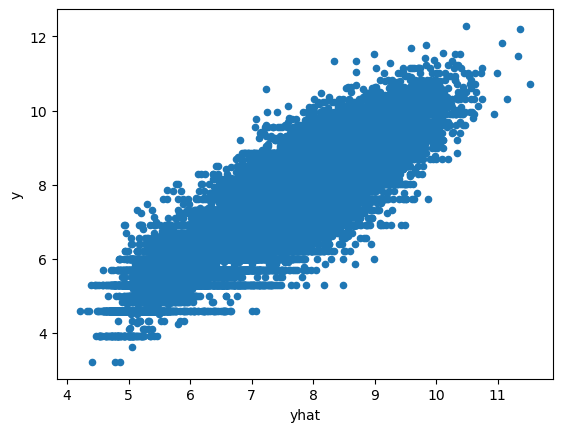

In [40]:
%matplotlib inline
df = pd.DataFrame({'y':ugd_y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

In [27]:
result.get_beta()

j
Avocado                   0.588379
Beans (dry)               0.409169
Beef                      0.450475
Bread                     0.533588
Cabbage (green)           0.420185
Cassava (dry)             0.307696
Cassava (fresh)           0.292622
Chapati                   0.456595
Chicken                   0.336392
Cooking Oil               0.511878
Dodo                      0.504313
Dry/Smoked Fish           0.549655
Eggplant                  0.461610
Eggs                      0.644178
Fresh Fish                0.575933
Goat Meat                 0.422822
Ground Nuts (pounded)     0.364682
Ground Nuts (shelled)     0.618427
Maize (cobs)              0.466558
Maize (flour)             0.388214
Mangos                    0.627972
Matoke                    0.433919
Millet                    0.326976
Onions                    0.458546
Oranges                   0.505017
Other Alcoholic Drinks    0.470761
Other Vegetables          0.545350
Pawpaw                    0.427537
Pork              

In [28]:
result.get_gamma()

k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize,Constant
j,,,,,,,,,,,,,,,,
Avocado,-0.017022,0.040383,0.085357,0.057376,0.033778,0.093698,0.090873,-0.056665,0.102690,0.096348,0.088200,0.114279,0.135625,0.155803,0.064484,7.110185
Beans (dry),0.035877,-0.010599,0.104012,0.050623,0.096566,0.109317,0.158134,0.015557,0.054442,0.125341,0.092897,0.077161,0.098424,0.173038,0.093793,8.187674
Beef,-0.075917,0.056709,0.044908,0.059262,0.074835,0.100295,0.128835,-0.088434,0.086130,0.037981,0.021540,0.099057,0.116606,0.150417,0.018065,9.078498
Bread,-0.258717,0.000349,0.045100,0.087147,0.121055,0.063794,0.055851,-0.059545,0.042849,0.001126,0.036063,0.110168,0.219202,0.164781,0.063769,7.959913
Cabbage (green),-0.001170,0.019499,0.034065,0.085531,0.038855,0.057547,0.100799,0.016914,-0.012753,0.068554,0.030950,0.065302,0.106563,0.119714,0.074959,7.034253
Cassava (dry),0.094600,-0.008534,0.042279,0.017159,0.052540,0.114369,0.195469,0.028261,0.145111,0.037117,0.159309,0.096261,0.058500,-0.045288,0.052256,8.433321
Cassava (fresh),-0.027513,0.037203,0.085346,0.085630,0.085075,0.118772,0.123921,-0.007042,0.131753,0.093166,0.138213,0.109007,0.034099,0.124553,0.170360,8.009837
Chapati,-0.070762,0.045395,0.097121,0.030148,0.164418,0.041021,-0.020996,-0.136423,0.051800,0.107077,-0.026025,0.161951,0.055865,-0.154211,0.005441,7.594179
Chicken,-0.214578,0.111135,-0.088050,-0.016841,0.129362,0.095046,0.173778,-0.096605,0.061147,-0.013939,0.117773,0.131648,0.213168,0.118675,-0.033599,9.515051


**Welfare**

<Axes: ylabel='Density'>

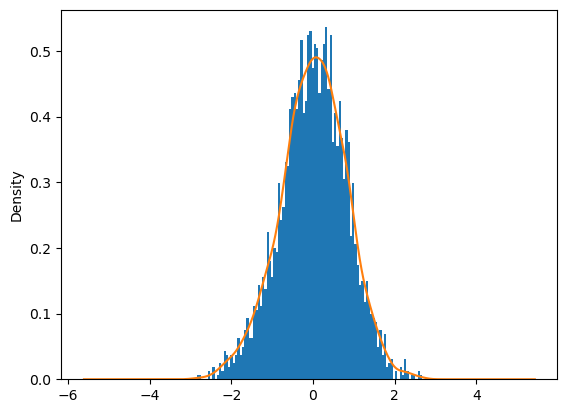

In [41]:
ax = result.get_w().plot.hist(bins=100,density=True)
result.get_w().plot.kde(ax=ax)

In [42]:
result.to_pickle('Uganda_Estimates.rgsn')

In [43]:
#Load results:
#import cfe
#result = cfe.regression.read_pickle('uganda_estimates.rgsn')

**Budgets**

In [45]:
xhat = result.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median
xref

np.float64(157998.5550165007)

In [50]:
ugd_p1

t                   2015-16                                        
m                   Central      Eastern     Northern       Western
j                                                                  
Apples          2444.678155  2765.445752  2817.179700   2280.574043
Avocado          772.047798   527.867923   577.427162    476.555939
Beans (dry)     2430.222603  2497.324159  5151.075269   2498.998822
Beans (fresh)   3081.552288  2829.373691  4229.389140   1632.899600
Beef            8741.190476  7923.907563  8106.250000   8413.978491
...                     ...          ...          ...           ...
Tea            10520.335980  8967.003309  9028.590514  14303.806580
Tomatoes         744.100045   626.924973   511.198040   1195.389723
Water           1348.245614  1530.303030  1031.250000   1244.444444
Watermelon      5246.592603  4721.257464  6910.704382   5038.712959
Wheat (flour)   3071.818182  3240.000000  3000.000000   2075.000000

[70 rows x 4 columns]

In [51]:
# Reference prices chosen from a particular time; average across place.
# These are prices per kilogram:
pbar = ugd_p1.mean(axis=1)
pbar = pbar[result.beta.index] # Only use prices for goods we can estimate

# Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar = pbar.replace(np.nan,1)

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,j,p=pbar):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

In [55]:
pbar

j
Avocado                     588.474705
Beans (dry)                3144.405213
Beef                       8296.331632
Bread                      3442.656835
Cabbage (green)            2208.082893
Cassava (dry)              1070.314831
Cassava (fresh)            1159.401954
Chapati                    1684.685895
Chicken                   29308.722842
Cooking Oil                2510.940210
Dodo                        665.222819
Dry/Smoked Fish            3577.282747
Eggplant                   4647.975496
Eggs                       1692.033481
Fresh Fish                 2789.250968
Goat Meat                  8997.666930
Ground Nuts (pounded)      6161.395193
Ground Nuts (shelled)      3465.425289
Maize (cobs)                679.358775
Maize (flour)              1958.632680
Mangos                      530.127008
Matoke                     1325.740680
Millet                     2489.022146
Onions                      756.693318
Oranges                     671.339411
Other Alcoholic Drinks 

**Demand as a function of prices**

Text(0.5, 0, 'Quantities of Bread Demanded')

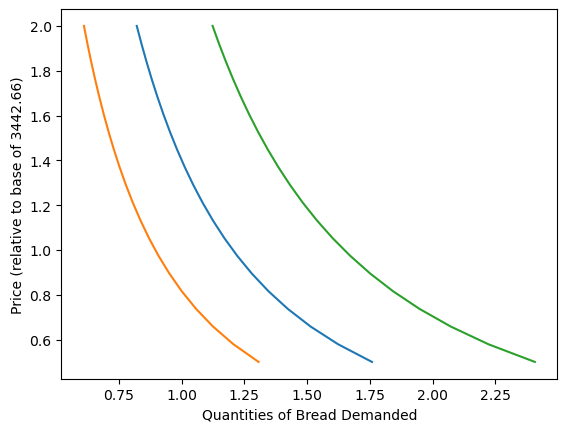

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

use = 'Bread'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for Millet for household at median budget
plt.plot([result.demands(xref,my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 25% percentile
plt.plot([result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 75% percentile
plt.plot([result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

**Engel Curves**

Text(0.5, 1.0, 'Engel Curves')

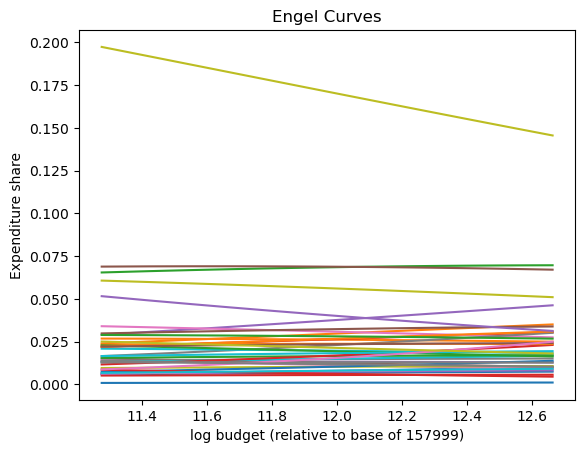

In [58]:
fig,ax = plt.subplots()

ax.plot(np.log(scale*xref),[result.expenditures(s*xref,pbar)/(s*xref) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref:.0f})')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves')

**Utility Function**

Text(0.5, 1.0, 'Indirect Utility Function')

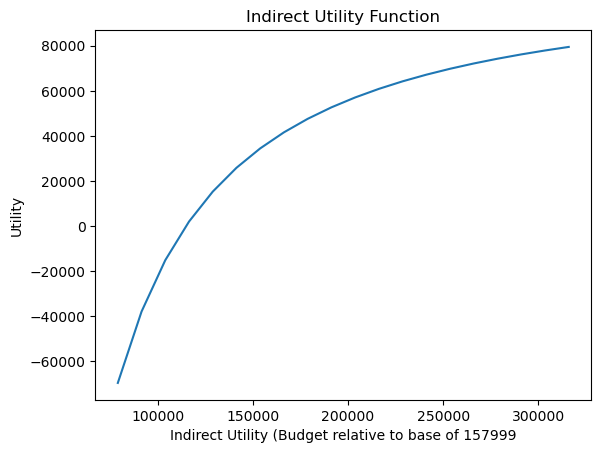

In [64]:
fig,ax = plt.subplots()

ax.plot(scale*xref,[result.indirect_utility(s*xref,pbar) for s in scale])
ax.set_xlabel(f'Indirect Utility (Budget relative to base of {xref:.0f}')
ax.set_ylabel(f'Utility')
ax.set_title('Indirect Utility Function')

**Calculating Nutrition**

In [63]:
xhat.unstack('j')

,,j,Avocado,Beans (dry),Beef,Bread,Cabbage (green),Cassava (dry),Cassava (fresh),Chapati,Chicken,Cooking Oil,...,Restaurant (food),Restaurant (soda),Rice,Salt,Sim Sim,Sugar,Sweet Bananas,Sweet Potatoes (fresh),Tea,Tomatoes
i,t,m,,,,,,,,,,,,,,,,,,,,,
H0010101,2015-16,Central,2120.091976,4134.714022,12529.833925,4827.659106,1310.316756,2038.777470,4465.376262,3491.238020,18905.655333,2243.516547,...,31180.250497,5318.004199,5229.557658,309.228432,3154.243442,3946.434765,3014.963373,4220.919432,231.738095,1920.197224
H0010201,2015-16,Central,1025.032025,2786.286587,6359.277828,1773.064081,814.347184,1418.410759,2877.091448,1672.827852,8310.115475,1140.454212,...,10819.830619,2454.612096,2882.153981,252.592975,1838.007831,2318.351766,1072.023341,2979.619426,143.924257,913.376002
H0010401,2015-16,Central,688.169910,1941.530480,5072.421119,1293.279826,600.273951,1068.653385,2695.119659,1172.204018,8687.700608,694.405944,...,7037.476815,1223.872817,2968.753066,230.547394,1775.203288,1849.946025,566.538283,3628.644178,115.750939,612.019998
H0020801,2015-16,Central,2291.634630,5357.336226,14554.827714,5745.639061,1520.304061,2039.206483,5178.714853,2794.913510,22586.589067,2238.392714,...,28137.345826,5504.782901,6685.805691,354.024788,3636.796698,4505.662053,3890.002207,5338.356869,295.275897,2188.403211
H0020901,2015-16,Central,1789.212492,4147.259728,10811.574960,4314.447218,1169.308865,2096.998481,4769.298522,2933.557203,18788.801389,2105.650983,...,22503.531245,3988.589591,5045.579530,321.052972,2792.230519,3865.372977,2452.581600,4507.148285,226.302178,1703.043606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H4300701,2015-16,Western,1341.053862,4867.536887,8993.076136,2987.075625,1186.609004,5644.894446,3712.268903,4619.227770,13079.419486,1669.375259,...,17443.507879,3687.633644,3545.329141,334.826239,1350.104276,1854.009250,2311.729870,3338.565705,272.720044,1508.687872
H4300801,2015-16,Western,1184.383262,4816.455994,7534.911998,1945.234720,1088.896498,5519.512843,3649.988771,3780.494425,8597.559869,1368.548976,...,10795.732160,2750.968695,3302.750040,359.512803,1198.211108,1670.547096,1660.916212,4075.201146,230.916121,1159.873351
H4300901,2015-16,Western,2357.710545,8629.229580,13501.416570,3723.532191,1607.284042,10424.423001,7912.279048,3062.863320,21719.206266,1489.279481,...,9383.816639,2853.611787,6392.747512,481.189990,2141.744053,2822.947906,3193.363658,9385.209964,369.275578,1502.422893


In [62]:
ugd_p1

t                   2015-16                                        
m                   Central      Eastern     Northern       Western
j                                                                  
Apples          2444.678155  2765.445752  2817.179700   2280.574043
Avocado          772.047798   527.867923   577.427162    476.555939
Beans (dry)     2430.222603  2497.324159  5151.075269   2498.998822
Beans (fresh)   3081.552288  2829.373691  4229.389140   1632.899600
Beef            8741.190476  7923.907563  8106.250000   8413.978491
...                     ...          ...          ...           ...
Tea            10520.335980  8967.003309  9028.590514  14303.806580
Tomatoes         744.100045   626.924973   511.198040   1195.389723
Water           1348.245614  1530.303030  1031.250000   1244.444444
Watermelon      5246.592603  4721.257464  6910.704382   5038.712959
Wheat (flour)   3071.818182  3240.000000  3000.000000   2075.000000

[70 rows x 4 columns]

In [60]:
import cfe
result = cfe.read_pickle('Uganda_Estimates.rgsn')  # Get persistent result saved above...

xhat = result.predicted_expenditures()

# Expenditures divided by prices/kg gives quantities in kgs...
qhat = (xhat.unstack('j')/ugd_p1).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

ValueError: cannot join with no overlapping index names